### https://www.jianshu.com/p/53d9a57c7063

In [2]:
eggnogout = read.table('./eggnog/eggnog.emapper.annotations',sep = '\t',skip = 3
                  ,fill=TRUE,header =F,quote = '')

In [ ]:
dim(eggnogout)

In [ ]:
colnames(eggnogout) = c('query','seed_ortholog','evalue','score',
                        'tax_level','Preferred_name','GOs','EC',
                         'KEGG_ko','KEGG_Pathway','KEGG_Module',
                         'KEGG_Reaction','KEGG_rclass','BRITE',
                         'KEGG_TC','CAZy','BiGG_Reaction','taxonomic_scope',
                         'eggNOG_OGs','bestOGs','COGFunctional','eggNOG_free'
                        )
system("cp -rf /data/script/annotation ./")
write.csv(eggnogout,file = './annotation/egg.csv')
system("cd ./annotation &&  /root/miniconda3/envs/Rdoc/bin/Rscript run_eggmapper.R ")

outdir = paste(getwd(),"2.gene_annotation",sep = "/")
if(dir.exists(outdir)){
  print("dir exists")
}else{
  dir.create(outdir)
}
gene.TPM = read.table('./Salmon_merge/gene.TPM',header =T)
colnames(gene.TPM)[1] = 'query'
library(dplyr)
egg_merge  = left_join(eggnogout,gene.TPM ,by='query')
write.csv(egg_merge,file = paste0(outdir,'/','egg_merge.csv'),row.names = F)

[1] "dir exists"


Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
dvcan2out = read.table('./dbCAN2out/all.dbcan2.txt')
colnames(dvcan2out)[1] = 'query'
dvcan2_merge  = left_join(dvcan2out,gene.TPM ,by='query')
write.csv(dvcan2_merge,file = paste0(outdir,'/','dvcan2_merge.csv'),row.names = F)
VFDbout = read.table('./VFDBout/all.vf.txt')
colnames(VFDbout)[1] = 'query'
VFDB_merge  = left_join(VFDbout,gene.TPM ,by='query')
write.csv(VFDB_merge,file = paste0(outdir,'/','VFDB_merge.csv'),row.names = F)

In [6]:
system("sed 's/ # /\t/g' ./CARDout/all.card.out.txt > ./CARDout/new.card.txt && awk -F'\t' 'NR==FNR{a[$1]=$0;}NR!=FNR{print $0,a[$1]}' ./Salmon_merge/gene.TPM ./CARDout/new.card.txt >./2.gene_annotation/CARD_merge.txt")

In [7]:
reads = read.table('./Salmon_merge/gene.count',header =T,row.names = 1)
count = ceiling(as.matrix(reads))
outdir = paste(getwd(),"3.enrichment",sep = "/")
if(dir.exists(outdir)){
  print("dir exists")
}else{
  dir.create(outdir)
}
outdir2 = paste(getwd(),"3.enrichment/DEGsid",sep = "/")
if(dir.exists(outdir2)){print("dir exists")}else{dir.create(outdir2)}
write.csv(count ,file = paste0(outdir,'/','count.csv'))
design = read.table('./sample.txt',header =T)
design$countsid = design$sample
design$rep = 1
colnames(design) =c('sample_id','Group','counts_id','rep')
design = design[,c(1,3,2,4)]
write.table(design,file = paste0(outdir,'/','design.txt'),quote = F,sep = '\t',row.names = F)

[1] "dir exists"
[1] "dir exists"


In [3]:
library(GenomicFeatures)
library(DESeq2)
library(dplyr)

Warning message:
“package ‘GenomicFeatures’ was built under R version 4.2.2”
Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.2.3”
Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Warning 

In [4]:
## 参考链接 https://www.jianshu.com/p/93b6cafcdbc2
file_in <- "3.enrichment/count.csv"
file_design <- "./3.enrichment/design.txt"
file_compare <- "./3.enrichment/compare.txt"

In [5]:
file_deg_num = paste0("./3.enrichment/","DE_",file_in)
file_final_genelist = paste0("./3.enrichment/","DEG_geneid_allcomapre.txt")
file_final_csv=paste0(file_in,"_Final_Out.csv")

In [6]:
data_in = read.csv(file_in,row.names = 1)
#data_in = read.table(file_in,row.names = 1,header =T)
mycompare=read.table(file_compare,head=TRUE)
mydesign=read.table(file_design, head = TRUE)
countData = as.data.frame(data_in)

In [ ]:
mycounts_filter = countData[apply(countData, 1, function(x) sum(x > 0) > 0.5*ncol(countData)), ]

In [ ]:
write.table(as.data.frame(rownames(mycounts_filter)),file = './annotation/geneid.txt',quote = F,row.names = F)

In [45]:
#mycounts_filter2 <- mycounts_filter[rowSums(mycounts_filter) >= 20,]

In [60]:
# saveRDS(mycounts_filter,file = './4.cor/mycounts_filter.rds')

In [1]:
mycounts_filter = readRDS('./4.cor/mycounts_filter.rds')

In [2]:
head(mycounts_filter,2)

,KO.CLP1,KO.CLP2,KO.CLP3,KO.CLP4,KO.CLP5,KO.CLP6,KO.CLP7,KO.CLP8,KO.NC1,KO.NC2,⋯,WT.CLP7,WT.CLP8,WT.NC1,WT.NC2,WT.NC3,WT.NC4,WT.NC5,WT.NC6,WT.NC7,WT.NC8
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
WT-NC8.dna_NODE_548486_length_134_cov_4.714286_1,1,0,2,3,5,1,4,1,1,0,⋯,8,3,0,1,0,0,0,1,0,1
WT-NC8.dna_NODE_548322_length_140_cov_3.076923_1,0,11,14,5,14,9,15,9,12,11,⋯,16,32,9,22,3,1,0,3,2,1


In [3]:
dim(mycounts_filter)

[1] 253480     32

### pca看看

In [4]:
library(ropls)
library(ggplot2)
library(ggsci)
library(Cairo)
library(tidyverse)
library(extrafont)
loadfonts()

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘ggsci’ was built under R version 4.2.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tibble::view()  mask

In [5]:
dataMatrix= t(mycounts_filter)

In [ ]:
sampleMetadata = read.table('../workdirV6//sample.txt',sep = '\t',header =T)

rownames(sampleMetadata) = gsub('-','.',rownames(sampleMetadata))

In [64]:
rv <- genefilter::rowVars(mycounts_filter)
select <- order(rv, decreasing = TRUE)[seq_len(3000)]
pca_data <- cbind(t(log10(mycounts_filter[select,]+1)),sampleMetadata)

In [18]:
library(tidyverse)
library(factoextra)
library(ggplot2)
library(genefilter)

Warning message:
“package ‘factoextra’ was built under R version 4.2.3”
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
“package ‘genefilter’ was built under R version 4.2.3”

Attaching package: ‘genefilter’


The following object is masked from ‘package:readr’:

    spec




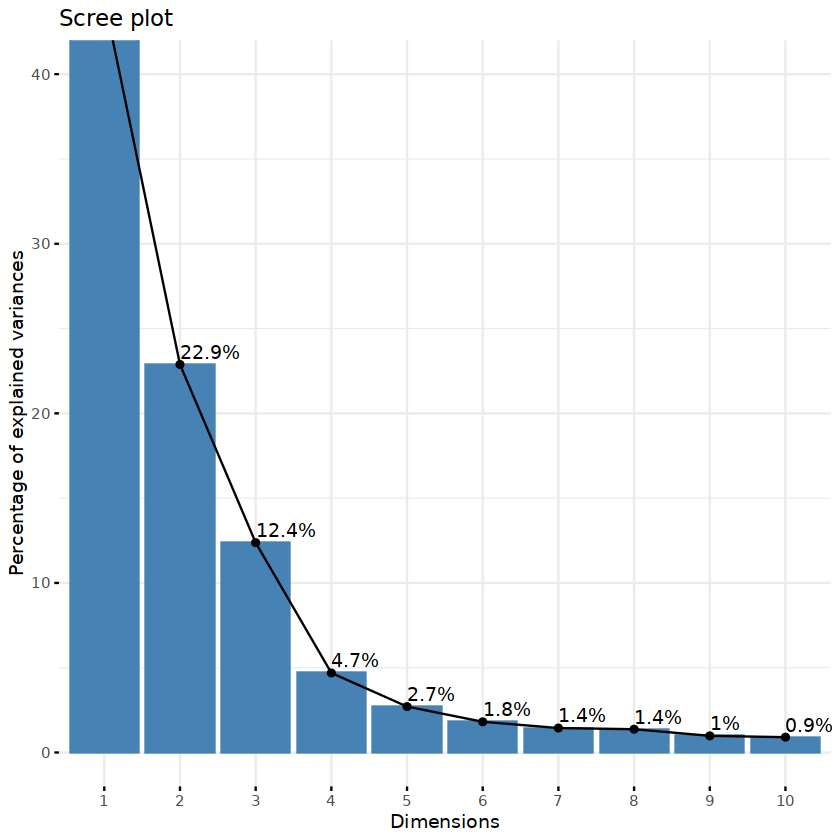

In [19]:
fviz_screeplot(expr_pca, addlabels = TRUE, ylim = c(0, 40))

In [33]:
PCA <- fviz_pca_ind(expr_pca,            
                    label = 'none',             
                    geom.ind = c('point','text'),             
                    habillage = sampleMetadata$group,    #分组变量             
                    addEllipses = T,    
                    repel = F,
                    ellipse.level = c(0.88),             
                    palette = c('#1F78B4','#33A02C','#FF7F00','red')) +  theme_bw((base_size=14))+    
theme(text = element_text(size = 6),        
      legend.margin = margin(-10),        
      axis.text = element_text(size = 5, colour = 'black'),        
      legend.text = element_text(size = 6),        
      legend.title = element_blank(),        
      legend.key.size = unit(0.5, "cm")  )+ggtitle('')

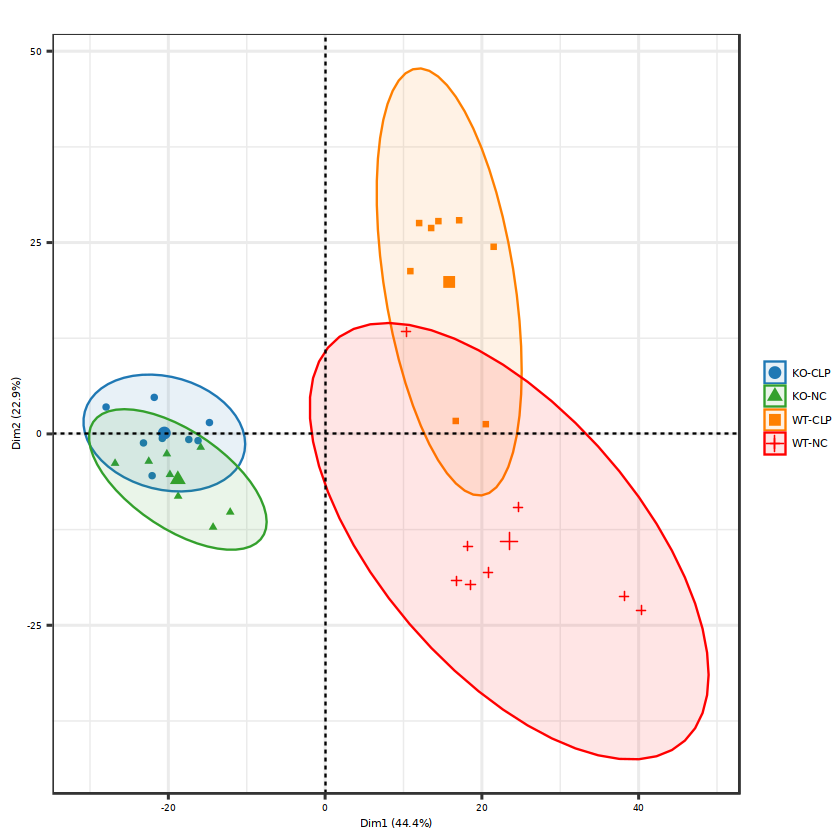

In [34]:
PCA

In [65]:
dataMatrix2 = mycounts_filter[select,]

In [46]:
sampleMetadata = read.table('../workdirV6//sample.txt',sep = '\t',header =T,row.names = 1)

In [66]:
dataMatrix= as.data.frame(t(dataMatrix2))

In [67]:
head(dataMatrix,2)

,KO-CLP1.dna_NODE_11216_length_2350_cov_270.246514_1,KO-CLP2.dna_NODE_2783_length_9123_cov_238.167185_5,WT-CLP8.dna_NODE_5065_length_6053_cov_48.973675_4,WT-NC3.dna_NODE_18592_length_2594_cov_5.254155_2,KO-NC2.dna_NODE_1155_length_14779_cov_129.221471_5,WT-NC3.dna_NODE_59602_length_1225_cov_16.645719_1,WT-CLP3.dna_NODE_528_length_41059_cov_38.392578_2,KO-CLP3.dna_NODE_19314_length_1648_cov_293.235371_1,KO-NC8.dna_NODE_2309_length_16154_cov_18.464154_19,KO-CLP1.dna_NODE_43140_length_959_cov_138.010817_1,⋯,KO-CLP1.dna_NODE_357_length_63044_cov_8.679959_27,KO-CLP6.dna_NODE_409221_length_179_cov_64.461538_1,KO-CLP1.dna_NODE_989_length_23948_cov_9.329751_3,KO-CLP1.dna_NODE_2027_length_10539_cov_15.896274_15,KO-CLP3.dna_NODE_2317_length_9351_cov_1.410126_2,KO-CLP5.dna_NODE_388_length_89963_cov_3.283094_20,KO-CLP1.dna_NODE_2601_length_8075_cov_9.858203_6,KO-CLP2.dna_NODE_220_length_104948_cov_10.666698_17,KO-CLP1.dna_NODE_556_length_44210_cov_8.730576_10,KO-CLP1.dna_NODE_310_length_69802_cov_15.133405_31
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
KO.CLP1,12501,10584,3771,3120,8037,2376,0,2322,0,2252,⋯,261,1464,237,254,20,0,204,8,288,747
KO.CLP2,11701,9757,7618,7794,7166,5339,0,5616,0,5070,⋯,688,404,550,552,37,0,455,573,626,461


In [58]:
sampleMetadata = read.table('../workdirV6//sample.txt',sep = '\t',header =T,check.names = T)
sampleMetadata$sample = gsub('-','.',sampleMetadata$sample)
sampleMetadata$group = gsub('-','.',sampleMetadata$group)

In [59]:
groupFc = factor(sampleMetadata[,'group'],levels = c('KO.CLP','KO.NC','WT.CLP','WT.NC'))

PLS-DA
32 samples x 3000 variables and 1 response
standard scaling of predictors and response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE pre ort pR2Y  pQ2
Total    0.548    0.529   0.491 0.312   2   0 0.05 0.05


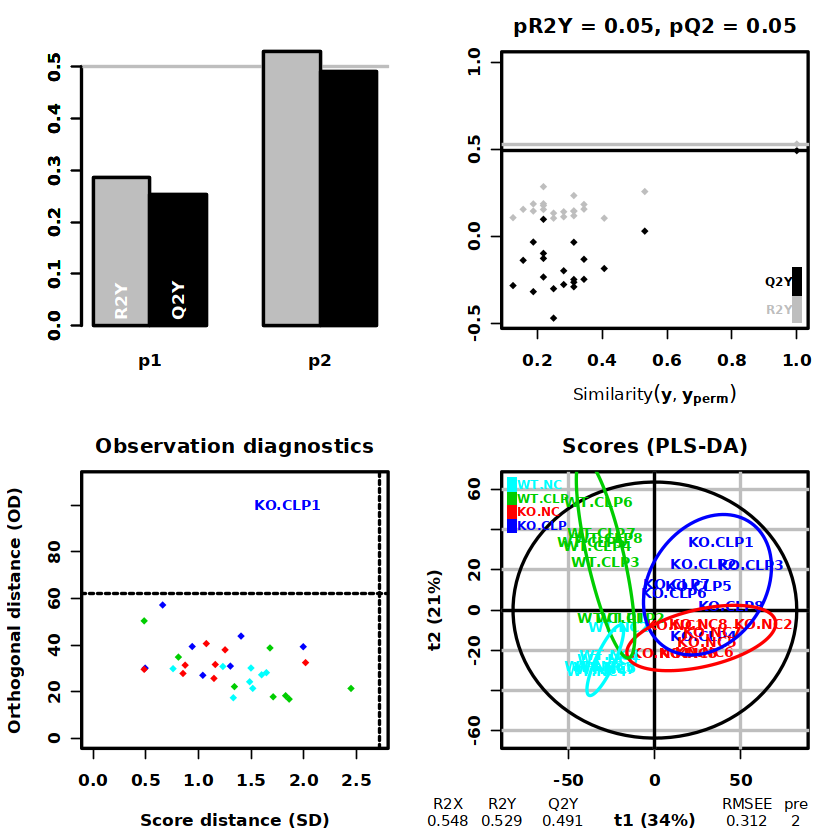

In [68]:
sacurine.plsda <- opls(dataMatrix, groupFc, predI = 2)

In [69]:
sample.score = sacurine.plsda@scoreMN %>% 
  as.data.frame() %>%
  mutate(group = groupFc)

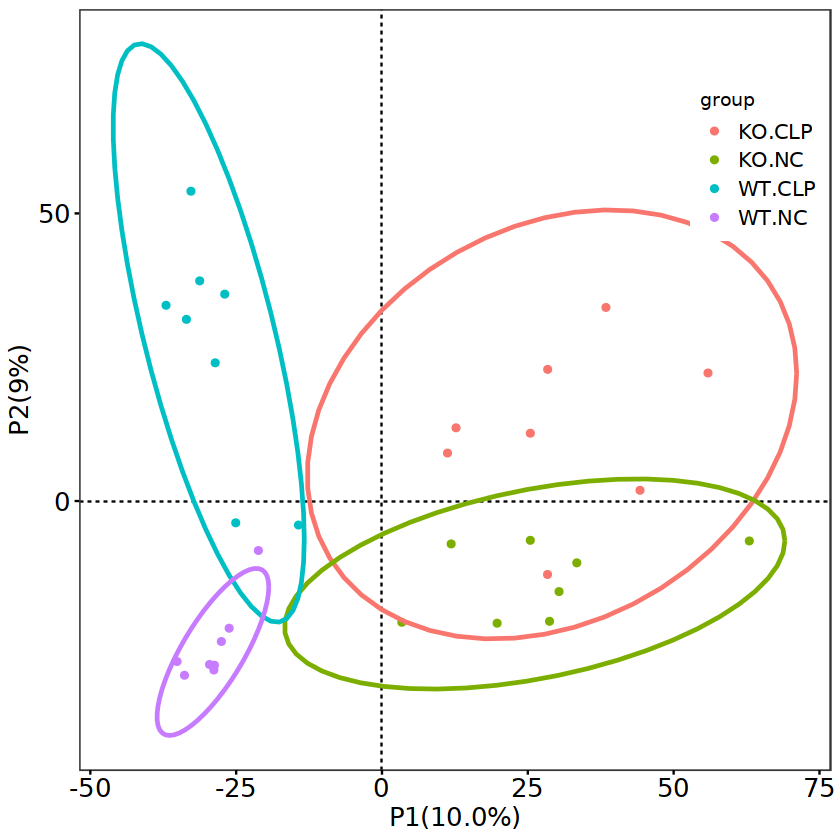

In [70]:
ggplot(sample.score, aes(p1, p2, color = group)) +
  geom_hline(yintercept = 0, linetype = 'dashed', size = 0.5) +
  geom_vline(xintercept = 0, linetype = 'dashed', size = 0.5) +
  geom_point() +
  geom_point(aes(-10,-10), color = 'white') +
  labs(x = 'P1(10.0%)',y = 'P2(9%)') +
  stat_ellipse(level = 0.95, linetype = 'solid', 
               size = 1, show.legend = FALSE) +
  #scale_color_manual(values = c('#008000','#FFA74F')) +
  theme_bw() +
  theme(legend.position = c(0.9,0.8),
    legend.text = element_text(color = 'black',size = 12, family = 'Arial', face = 'plain'),
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(color = 'black',size = 15, family = 'Arial', face = 'plain'),
    axis.title = element_text(color = 'black',size = 15, family = 'Arial', face = 'plain'),
    axis.ticks = element_line(color = 'black'))

In [9]:
head(mycompare)
head(mydesign)
total_num=dim(mycompare)[1]
tracking = 0
gene_num_out = c()
pvalue_cut = 0.05
condition_name = c()

,Test,denominator,numerator
,<chr>,<chr>,<chr>
1,KO-CLPvsWT-CLP,WT-CLP,KO-CLP
2,KO-NCvsWT-NC,WT-NC,KO-NC
3,WT-CLPvsWT-NC,WT-NC,WT-CLP
4,KO-CLPvsKO-NC,KO-NC,KO-CLP


,sample_id,counts_id,Group,rep
,<chr>,<chr>,<chr>,<int>
1,KO-CLP1,KO-CLP1,KO-CLP,1
2,KO-CLP2,KO-CLP2,KO-CLP,1
3,KO-CLP3,KO-CLP3,KO-CLP,1
4,KO-CLP4,KO-CLP4,KO-CLP,1
5,KO-CLP5,KO-CLP5,KO-CLP,1
6,KO-CLP6,KO-CLP6,KO-CLP,1


In [10]:
final_genelist = list()

In [11]:
for (index_num in c(1:total_num)){tracking = tracking + 1
test_name = as.character(mycompare[index_num,1])
group1 = as.character(mycompare[index_num, 2])
group2 = as.character(mycompare[index_num, 3])
sample1 = mydesign[mydesign$Group == group1,]
sample2 = mydesign[mydesign$Group == group2,]
allsample = rbind(sample1, sample2)
counts_sample = as.character(allsample$counts_id)
counts_sample = gsub('-','.',counts_sample)                  
groupreal = as.character(unique(allsample$Group))
countData1 = mycounts_filter[, counts_sample]
                     
colData = as.data.frame(cbind(counts_sample, groupreal))
names(colData) = c("sample", "condition")
dds <- DESeqDataSetFromMatrix(countData = countData1,
                            colData = colData,
                            design = ~ condition)
dds <- DESeq(dds)
resSFtreatment <- results(dds, cooksCutoff =FALSE, contrast=c("condition",group2,group1))
out_test = as.data.frame(resSFtreatment)
print(dim(out_test))
final_each = cbind( out_test$log2FoldChange,out_test$pvalue,out_test$padj)
rownames(final_each) = resSFtreatment@rownames
names = c('(logFC)','(pvalue)','(Qvalue)')
final_name = paste(test_name,'_',names,sep="")
colnames(final_each) = final_name
if (tracking == 1){
final_table = final_each
}else{
final_table = cbind(final_table, final_each)
}
gene_sel = out_test[((!is.na(out_test$pvalue))&(!is.na(out_test$log2FoldChange)))&out_test$pvalue < 0.05 & abs(out_test$log2FoldChange) >= 0 & out_test$pvalue<0.05, ]
gene_sel<-na.omit(gene_sel)
gene_sel_up = gene_sel [gene_sel$log2FoldChange>0,]
gene_sel_do = gene_sel [gene_sel$log2FoldChange<0,]
file_out_up = paste("3.enrichment/DEGsid/","UP_",test_name,".txt",sep="")
file_out_do = paste("3.enrichment/DEGsid/","DOWN_",test_name,".txt",sep="")
## 输出全部基因
out_test1 = na.omit(out_test)
all = paste("3.enrichment/DEGsid/","ALL_",test_name,".txt",sep="")                                  

                                  
gene_list_up = rownames(gene_sel_up)
gene_list_do = rownames(gene_sel_do)
all_ub_down = list(gene_list_up, gene_list_do)
nameup <- paste(test_name,"_up",sep="")
namedown <- paste(test_name,"_down",sep="")
names(all_ub_down) = c(nameup, namedown)
if (tracking == 1){
final_genelist = all_ub_down
}else{
final_genelist = c(final_genelist, all_ub_down)
}
gene_num_up = length(gene_list_up)
gene_num_do = length(gene_list_do)
write.table(gene_sel_up, file= file_out_up , row.names = TRUE,col.names = TRUE,quote = F)
write.table(gene_sel_do, file= file_out_do , row.names = TRUE,col.names = TRUE,quote = F)
## 输出
write.table(out_test1, file= all , row.names = TRUE,col.names = TRUE,quote = F)

                                  
condition_name = c(condition_name, paste("UP_",test_name,sep=""),paste("DO_",test_name,sep=""))
gene_num_out = c(gene_num_out,gene_num_up,gene_num_do)
}

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automa

[1] 253480      6


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

[1] 253480      6


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

[1] 253480      6


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

[1] 253480      6


In [12]:
final_DEGs_list<-do.call(cbind, lapply(lapply(final_genelist, unlist), `length<-`, max(lengths(final_genelist))))
final_DEGs_list
out_final2 = cbind(condition_name, gene_num_out)
colnames(out_final2) = c("Tests", "DEG number")
write.table(final_DEGs_list, file=file_final_genelist, row.names = FALSE, sep="\t", na = "",quote = F)
write.table(out_final2, file=file_deg_num, row.names = FALSE, sep="\t",quote = F)
write.csv(final_table, file=file_final_csv, row.names = TRUE,quote=TRUE)

KO-CLPvsWT-CLP_up,KO-CLPvsWT-CLP_down,KO-NCvsWT-NC_up,KO-NCvsWT-NC_down,WT-CLPvsWT-NC_up,WT-CLPvsWT-NC_down,KO-CLPvsKO-NC_up,KO-CLPvsKO-NC_down
WT-NC8.dna_NODE_544307_length_216_cov_9.348315_1,WT-NC8.dna_NODE_536291_length_280_cov_0.522876_1,WT-NC8.dna_NODE_387718_length_350_cov_1.340807_1,WT-NC8.dna_NODE_262483_length_451_cov_1.040123_1,WT-NC8.dna_NODE_210491_length_520_cov_0.880407_2,WT-NC8.dna_NODE_452756_length_314_cov_0.508021_1,WT-NC8.dna_NODE_545410_length_196_cov_4.072464_1,WT-NC8.dna_NODE_544909_length_204_cov_2.051948_1
WT-NC8.dna_NODE_423834_length_329_cov_0.797030_1,WT-NC8.dna_NODE_520834_length_285_cov_0.253165_1,WT-NC8.dna_NODE_361637_length_367_cov_0.766667_1,WT-NC7.dna_NODE_424030_length_321_cov_0.355670_1,WT-NC8.dna_NODE_107214_length_820_cov_0.479076_2,WT-NC8.dna_NODE_163879_length_615_cov_3.196721_1,WT-NC8.dna_NODE_423834_length_329_cov_0.797030_1,WT-NC8.dna_NODE_493023_length_294_cov_0.808383_1
WT-NC8.dna_NODE_399733_length_343_cov_0.643519_1,WT-NC8.dna_NODE_516377_length_286_cov_0.578616_1,WT-NC8.dna_NODE_257704_length_457_cov_0.378788_1,WT-NC7.dna_NODE_198036_length_548_cov_1.515439_1,WT-NC8.dna_NODE_88671_length_932_cov_0.662112_1,WT-NC8.dna_NODE_104664_length_833_cov_0.621813_2,WT-NC8.dna_NODE_257704_length_457_cov_0.378788_1,WT-NC8.dna_NODE_475662_length_302_cov_2.857143_1
WT-NC8.dna_NODE_341540_length_381_cov_1.019685_1,WT-NC8.dna_NODE_493023_length_294_cov_0.808383_1,WT-NC8.dna_NODE_242398_length_475_cov_0.468391_1,WT-NC7.dna_NODE_193056_length_558_cov_1.227378_1,WT-NC8.dna_NODE_63028_length_1175_cov_0.658397_1,WT-NC8.dna_NODE_39124_length_1626_cov_3.261508_1,WT-NC8.dna_NODE_237357_length_481_cov_0.799435_1,WT-NC8.dna_NODE_474163_length_303_cov_0.784091_1
WT-NC8.dna_NODE_308819_length_407_cov_0.492857_1,WT-NC8.dna_NODE_456353_length_312_cov_0.627027_1,WT-NC8.dna_NODE_237357_length_481_cov_0.799435_1,WT-NC7.dna_NODE_190128_length_564_cov_0.947368_1,WT-NC8.dna_NODE_8264_length_4795_cov_1.022065_1,WT-NC8.dna_NODE_29936_length_1952_cov_0.910137_1,WT-NC8.dna_NODE_62968_length_1175_cov_3.992366_2,WT-NC8.dna_NODE_465883_length_307_cov_0.905556_1
WT-NC8.dna_NODE_259640_length_454_cov_4.159021_1,WT-NC8.dna_NODE_415704_length_334_cov_0.454106_1,WT-NC8.dna_NODE_172985_length_593_cov_1.236052_2,WT-NC7.dna_NODE_179021_length_588_cov_1.295011_1,WT-NC7.dna_NODE_430650_length_317_cov_0.363158_1,WT-NC8.dna_NODE_23954_length_2275_cov_1.184358_2,WT-NC8.dna_NODE_50757_length_1360_cov_1.428224_1,WT-NC8.dna_NODE_456148_length_312_cov_0.745946_1
WT-NC8.dna_NODE_257580_length_457_cov_0.469697_1,WT-NC8.dna_NODE_163879_length_615_cov_3.196721_1,WT-NC8.dna_NODE_158358_length_630_cov_0.546720_2,WT-NC7.dna_NODE_155990_length_647_cov_1.457692_1,WT-NC7.dna_NODE_43500_length_1540_cov_3.866950_1,WT-NC8.dna_NODE_19887_length_2589_cov_0.906580_1,WT-NC7.dna_NODE_142420_length_689_cov_1.430605_1,WT-NC8.dna_NODE_325756_length_393_cov_0.718045_1
WT-NC8.dna_NODE_243653_length_473_cov_0.797688_1,WT-NC8.dna_NODE_145516_length_666_cov_0.853432_1,WT-NC8.dna_NODE_157094_length_633_cov_0.877470_1,WT-NC7.dna_NODE_146818_length_675_cov_0.713504_1,WT-NC7.dna_NODE_14464_length_3305_cov_1.728131_2,WT-NC8.dna_NODE_17238_length_2853_cov_1.242113_3,WT-NC7.dna_NODE_70835_length_1111_cov_0.804878_1,WT-NC8.dna_NODE_300482_length_414_cov_0.689895_1
WT-NC8.dna_NODE_224058_length_500_cov_0.313673_1,WT-NC8.dna_NODE_141217_length_680_cov_0.582278_2,WT-NC8.dna_NODE_152181_length_647_cov_0.450000_1,WT-NC7.dna_NODE_134494_length_717_cov_0.661017_1,WT-NC7.dna_NODE_696_length_32707_cov_1.986126_28,WT-NC8.dna_NODE_6780_length_5525_cov_6.381623_7,WT-NC7.dna_NODE_66200_length_1161_cov_2.429400_2,WT-NC8.dna_NODE_262483_length_451_cov_1.040123_1
WT-NC8.dna_NODE_158924_length_628_cov_0.872255_1,WT-NC8.dna_NODE_129511_length_720_cov_2.092749_1,WT-NC8.dna_NODE_125367_length_736_cov_0.679803_2,WT-NC7.dna_NODE_134223_length_718_cov_0.622673_1,WT-NC6.dna_NODE_539251_length_250_cov_3.487805_1,WT-NC8.dna_NODE_6691_length_5574_cov_1.259776_5,WT-NC7.dna_NODE_61218_length_1228_cov_

Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file './3.enrichment/DE_3.enrichment/count.csv': No such file or directory”


ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


### 火山图

In [ ]:
final_DEGs_list_df = as.data.frame(final_DEGs_list)

In [78]:
library(tidyverse)
library(ggvenn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.3     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ stringr 1.5.0
✔ tidyr   1.3.0     ✔ forcats 1.0.0
✔ readr   2.1.4     
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ IRanges::collapse()     masks dplyr::collapse()
✖ Biobase::combine()      masks BiocGenerics::combine(), dplyr::combine()
✖ matrixStats::count()    masks dplyr::count()
✖ IRanges::desc()         masks dplyr::desc()
✖ tidyr::expand(

In [100]:
mycolor = c(
            "#998B95" ,"#5E549A" ,"#8952A0", "#4552A0",
            "#384B97" ,"#2B3B72" ,"#911310",
            "#384C99" ,"#9B8E8C" ,"#7CA878" ,"#35A132",
    "#B84D64" ,"#864A68" ,"#EE7072", "#E32D32" )

In [101]:
up <- final_DEGs_list_df %>% dplyr::select(contains("up"))

In [102]:
down <- final_DEGs_list_df %>% dplyr::select(contains("down"))

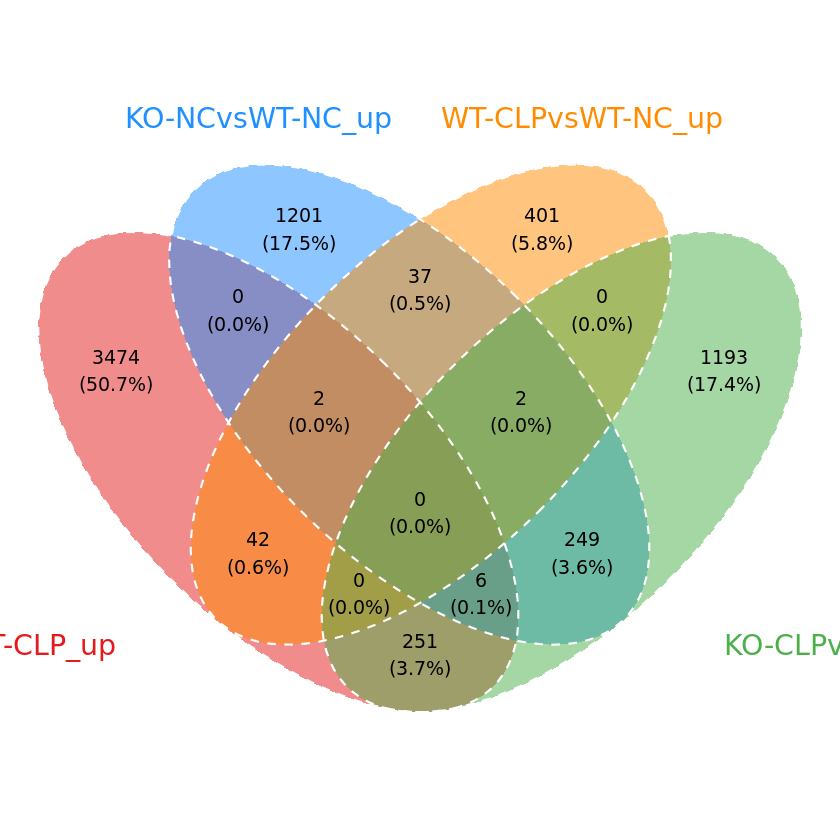

In [103]:
venn_input = as.list(up)  
venn_input %>%  ggvenn(show_percentage = T,show_elements = F,label_sep = ",",
         digits = 1,stroke_color = "white",stroke_alpha=1,
         stroke_size=0.6,
         stroke_linetype="dashed",
         fill_color = c("#E41A1C", "#1E90FF", "#FF8C00",
                        "#4DAF4A", "#984EA3"),
         set_name_color = c("#E41A1C", "#1E90FF","#FF8C00","#4DAF4A"))

In [104]:
ggsave(file = paste0(outdir,'/','upgene_number_venn.pdf'),width = 12,height = 8)
ggsave(file = paste0(outdir,'/','upgene_number_venn.png'),width = 12,height = 8)

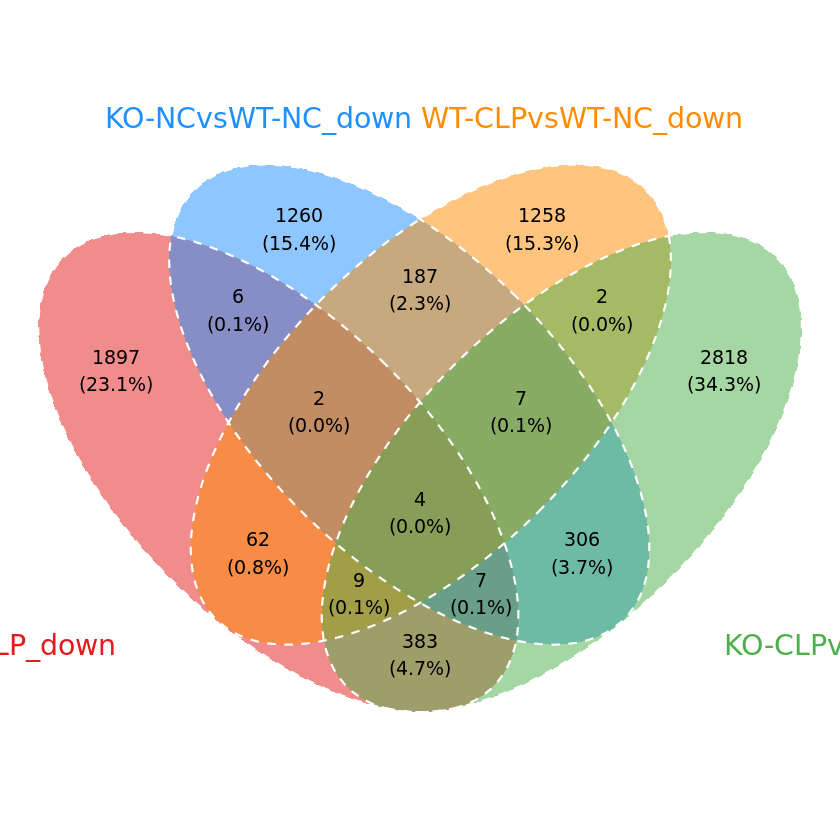

In [105]:
venn_input = as.list(down)  
venn_input %>%  ggvenn(show_percentage = T,show_elements = F,label_sep = ",",
         digits = 1,stroke_color = "white",stroke_alpha=1,
         stroke_size=0.6,
         stroke_linetype="dashed",
         fill_color = c("#E41A1C", "#1E90FF", "#FF8C00",
                        "#4DAF4A", "#984EA3"),
         set_name_color = c("#E41A1C", "#1E90FF","#FF8C00","#4DAF4A"))

In [106]:
ggsave(file = paste0(outdir,'/','downgene_number_venn.pdf'),width = 12,height = 8)
ggsave(file = paste0(outdir,'/','downgene_number_venn.png'),width = 12,height = 8)

In [48]:
enrichment<-function(species,outDir,geneList){
  library(clusterProfiler)
  library(org.Hs.eg.db)
  library(ggplot2)
  library(dplyr)
  library(rjson)
  library(jsonlite)
  if(species=="hsa" | species=="mmu"){
  species.org=switch(species,
                     "hsa"=org.Hs.eg.db,
                     "mmu"=org.Mm.eg.db,
  )
  species.kegg=switch(species,
                      "hsa"="/Business/psn_company/sc01/local/KEGG.db/hsa/",
                      "mmu"="/Business/psn_company/sc01/local/KEGG.db/mmu/",
  )
  library(KEGG.db,lib.loc=species.kegg)
  if(species=="hsa"){
    EG2symbol=toTable(org.Hs.egSYMBOL)
  }else if(species=="mmu"){
    EG2symbol=toTable(org.Mm.egSYMBOL)}
  #EG2symbol=toTable(paste0(species.org,"SYMBOL"))
  if("TRUE" %in% unique(geneList%in%EG2symbol$symbol)){
    gene.ncbi=bitr(geneList, fromType = "SYMBOL",
                   toType = "ENTREZID",
                   OrgDb = species.org)
    
    processGO(geneList,species.org,outDir)
    processKEGG(gene.ncbi[,2],species,outDir)
    processREACTOME(gene.ncbi[,2],species,outDir)
  }}else{
    
    json_dic<-read_json("/data/script/ref.json")
    pathwayInfo_KEGG_file <- json_dic[[species]][['kegg_desc']]
    pathwayInfo_GO_file <- json_dic[[species]][['go_desc']]
    
    #make term2gene and term2name mapping, name also called Description
    prepareMapping<-function(pathwayInfo,tag="term2gene",header=T){
      mat = pathwayInfo
      mat=switch(tag,
                 term2gene=mat[,c(2,1)],
                 term2name=mat[,c(2,3)])
      return(mat)
    }
    
    
    pathwayInfo_KEGG = read.delim(pathwayInfo_KEGG_file, header=F, sep="\t",check.names=F,quote="",colClasses = "character")
    term2gene=prepareMapping(pathwayInfo=pathwayInfo_KEGG,tag="term2gene")
    term2name=prepareMapping(pathwayInfo=pathwayInfo_KEGG,tag="term2name")
    kegg_enrichment<-enricher(geneList,
                              TERM2GENE = term2gene, 
                              TERM2NAME = term2name, 
                              pAdjustMethod = "BH",
                              minGSSize=1 ,maxGSSize=100000,
                              qvalueCutoff = 1, pvalueCutoff=1)
    
    if(!is.null(kegg_enrichment)){ #判断是否为空
      res=kegg_enrichment@result
      res$Total=apply(res,1,function(x){getBGnumber(x[4])})
      df=data.frame( PathwayID=res$ID,
                     Pathway=res$Description,
                     List=res$Count,
                     Total=res$Total,
                     Pvalue=res$pvalue,
                     adjustPvalue=res$p.adjust,
                     Gene=res$geneID
      )
      write.table(df,file=paste(outDir,"/","KEGG_enrichment.xls",sep=""),col.names=T,row.names=F,quote=F,sep='\t')
      if(nrow(df) < 20){out_df <- df[seq(1,nrow(df),1),]}else{out_df <- df[seq(1,20,1),]}
      out_df$Pathway=factor(out_df$Pathway,levels=unique(out_df$Pathway))
      out_df$Pathway=substring(out_df$Pathway,1,50)
      out_df<-out_df[!duplicated(out_df[,"Pathway"]),]
      out_df$rich=out_df$List / out_df$Total
      out_df$Number=out_df$List
      q<-qplot(rich,Pathway,data=out_df,colour=Pvalue,size=Number,main="KEGG Enrichment")+
        scale_colour_gradient(low="red",high="green",limits=c(0,1))+
        theme(panel.background=element_rect(fill="white",color="black"),panel.grid.major=element_line(color="grey80",linetype="dotted"))+theme_bw() 
      ggsave(paste(outDir,"KEGG.richfactor.pdf",sep="/"),width = 10, height = 10)
      ggsave(paste(outDir,"KEGG.richfactor.png",sep="/"),width = 10, height = 10)
      
      out_df$Pathway <- factor(out_df$Pathway, levels = out_df$Pathway)
      p<- ggplot(data = out_df) +
        geom_col(aes(x = Pathway, y = -log10(as.numeric(Pvalue)),fill=-log10(as.numeric(Pvalue))),width =0.8) +
        scale_color_brewer(type="seq",palette="Dark2")+
        theme( strip.text.y = element_text(angle = 0),axis.text.x=element_text(size=10,angle=80,hjust=1)) +
        ylab("-log10(P-value)")
      ggsave(paste(outDir,"KEGG_enrichment_pvalue_barplot.pdf",sep="/"), width = 10, height = 10)
      ggsave(paste(outDir,"KEGG_enrichment_pvalue_barplot.png",sep="/"), width = 10, height = 10)
      
    }
    
    pathwayInfo_GO = read.delim(pathwayInfo_GO_file, header=F, sep="\t",check.names=F,quote="",colClasses = "character")
    term2gene=prepareMapping(pathwayInfo=pathwayInfo_GO,tag="term2gene")
    term2name=prepareMapping(pathwayInfo=pathwayInfo_GO,tag="term2name")
    
    go_enrichment<-enricher(geneList,
                            TERM2GENE = term2gene, 
                            TERM2NAME = term2name, 
                            pAdjustMethod = "BH",
                            minGSSize=1 ,maxGSSize=100000,
                            qvalueCutoff = 1, pvalueCutoff=1)
    if(!is.null(go_enrichment)){
      res=go_enrichment@result
      res$Total=apply(res,1,function(x){getBGnumber(x[4])})
      df=data.frame( PathwayID=res$ID,
                     Pathway=res$Description,
                     List=res$Count,
                     Total=res$Total,
                     Pvalue=res$pvalue,
                     adjustPvalue=res$p.adjust,
                     Gene=res$geneID
      )
      write.table(df,file=paste(outDir,"/","GO_enrichment.xls",sep=""),col.names=T,row.names=F,quote=F,sep='\t')
      if(nrow(df) < 20){out_df <- df[seq(1,nrow(df),1),]}else{out_df <- df[seq(1,20,1),]}
      out_df$Pathway=factor(out_df$Pathway,levels=unique(out_df$Pathway))
      out_df$Pathway=substring(out_df$Pathway,1,50)
      out_df<-out_df[!duplicated(out_df[,"Pathway"]),]
      out_df$rich=out_df$List / out_df$Total
      out_df$Number=out_df$List
      q<-qplot(rich,Pathway,data=out_df,colour=Pvalue,size=Number,main="GO Enrichment")+
        scale_colour_gradient(low="red",high="green",limits=c(0,1))+
        theme(panel.background=element_rect(fill="white",color="black"),panel.grid.major=element_line(color="grey80",linetype="dotted"))
      
        ggsave(paste(outDir,"GO.richfactor.pdf",sep="/"),width = 10, height = 10)
      ggsave(paste(outDir,"GO.richfactor.png",sep="/"),width = 10, height = 10)
      
      out_df$Pathway <- factor(out_df$Pathway, levels = out_df$Pathway)
      p<- ggplot(data = out_df) +
        geom_col(aes(x = Pathway, y = -log10(as.numeric(Pvalue)),fill=-log10(as.numeric(Pvalue))),width =0.8) +
        scale_color_brewer(type="seq",palette="Dark2")+
        theme( strip.text.y = element_text(angle = 0),axis.text.x=element_text(size=10,angle=80,hjust=1)) +
        ylab("-log10(P-value)")
      ggsave(paste(outDir,"GO_enrichment_pvalue_barplot.pdf",sep="/"), width = 10, height = 10)
      ggsave(paste(outDir,"GO_enrichment_pvalue_barplot.png",sep="/"), width = 10, height = 10)
    }
  }}


processGO<- function(geneList,species.org,outDir){
  en <- enrichGO(gene       = geneList,
                 OrgDb         = species.org,
                 keyType       = 'SYMBOL',
                 ont           = "ALL",
                 minGSSize     = 1 ,
                 maxGSSize     = 100000 ,
                 pAdjustMethod = "BH",
                 pvalueCutoff  = 1,
                 qvalueCutoff  = 1)
  if(!is.null(en)){
    res=en@result
    res$Total=apply(res,1,function(x){getBGnumber(x[5])})
    df=data.frame( Category=res$ONTOLOGY,
                   GO=res$ID,
                   Term=res$Description,
                   List=res$Count,
                   Total=res$Total,
                   Pvalue=res$pvalue,
                   adjustPvalue=res$p.adjust,
                   Gene=res$geneID
    )
    df<-df[order(df$Pvalue),]
    write.table(df,file=paste(outDir,"/","GO_enrichment.xls",sep=""),col.names=T,row.names=F,quote=F,sep='\t')
    
    if(nrow(df) < 20){out_df <- df[seq(1,nrow(df),1),]}else{out_df <- df[seq(1,20,1),]}
    out_df$Term=factor(out_df$Term,levels=unique(out_df$Term))
    out_df$Term=substring(out_df$Term,1,50)
    out_df<-out_df[!duplicated(out_df[,"Term"]),]
    out_df$rich=out_df$List / out_df$Total
    out_df$Number=out_df$List
    q<-qplot(rich,Term,data=out_df,colour=Pvalue,size=Number,main="GO Enrichment")+
      scale_colour_gradient(low="red",high="green",limits=c(0,1))+
      theme(panel.background=element_rect(
          fill="white",color="black"),
            panel.grid.major=element_line(color="grey80",linetype="dotted"))+theme_bw() 
    ggsave(paste(outDir,"GO.richfactor.pdf",sep="/"),width = 10, height = 10)
    ggsave(paste(outDir,"GO.richfactor.png",sep="/"),width = 10, height = 10)
    
    out_df=out_df[order(out_df$Category),]
    
    out_df$Category <- factor(out_df$Category, levels = unique(out_df$Category))
    out_df$Term <- factor(out_df$Term, levels = out_df$Term)
    p<- ggplot(data = out_df) +
      geom_col(aes(x = Term, y = -log10(as.numeric(Pvalue)), fill = Category),width =0.8) +
      scale_color_brewer(type="seq",palette="Dark2")+
      theme( strip.text.y = element_text(angle = 0),axis.text.x=element_text(size=10,angle=80,hjust=1)) +
      ylab("-log10(P-value)")
    ggsave(paste(outDir,"GO_enrichment_pvalue_barplot.pdf",sep="/"), width = 10, height = 10)
    ggsave(paste(outDir,"GO_enrichment_pvalue_barplot.png",sep="/"), width = 10, height = 10)
    
    library(topGO)
    #ifor(catergory in c("CC","BP",'MF')){
     # ego <- enrichGO(gene       = geneList,
      #                OrgDb         = species.org,
       #               keyType       = 'SYMBOL',
        #              ont           = catergory,
         #             minGSSize     = 1 ,
          #            maxGSSize     = 100000 ,
           #           pAdjustMethod = "BH",
            #          pvalueCutoff  = 1,
             #         qvalueCutoff  = 1)
      #pdf(paste(outDir,"/","GODAG_",catergory,"_top10",".pdf",sep=""))
      #plotGOgraph(ego)
      #dev.off()
      #png(paste(outDir,"/","GODAG_",catergory,"_top10",".png",sep=""))
      #plotGOgraph(ego)
      #dev.off()
      
    #}
  }
}


processKEGG<- function(geneList,species,outDir){
  species.kegg=switch(species,
                      "hsa"="/Business/psn_company/sc01/local/KEGG.db/hsa/",
                      "mmu"="/Business/psn_company/sc01/local/KEGG.db/mmu/",
  )
  library(KEGG.db,lib.loc=species.kegg)
  en <- enrichKEGG(gene     = geneList,
                   organism      = species,
                   pAdjustMethod = "BH",
                   pvalueCutoff  = 1,
                   minGSSize     = 1 ,
                   maxGSSize     = 100000 ,
                   qvalueCutoff  = 1,
                   use_internal_data =T)
  
  kegg_level=read.table("/Business/psn_company/sc01/local/KEGG.db/pathway_level",header=F,sep="\t",stringsAsFactors=F,colClasses="character",row.names=1)
  #if(length(unique(en@result$p.adjust<0.05))>1)
  if(!is.null(en)){
    res=en@result
    res$Total=apply(res,1,function(x){getBGnumber(x[4])})
    df=data.frame( Category=kegg_level[gsub(species,"",res$ID),1] ,
                   PathwayID=res$ID,
                   Pathway=res$Description,
                   List=res$Count,
                   Total=res$Total,
                   Pvalue=res$pvalue,
                   adjustPvalue=res$p.adjust,
                   Gene=res$geneID
    )
    write.table(df,file=paste(outDir,"/","KEGG_enrichment.xls",sep=""),col.names=T,row.names=F,quote=F,sep='\t')
    if(nrow(df) < 20){out_df <- df[seq(1,nrow(df),1),]}else{out_df <- df[seq(1,20,1),]}
    out_df$Pathway=factor(out_df$Pathway,levels=unique(out_df$Pathway))
    out_df$Pathway=substring(out_df$Pathway,1,50)
    out_df<-out_df[!duplicated(out_df[,"Pathway"]),]
    out_df$rich=out_df$List / out_df$Total
    out_df$Number=out_df$List
    q<-qplot(rich,Pathway,data=out_df,colour=Pvalue,size=Number,main="KEGG Enrichment")+
      scale_colour_gradient(low="red",high="green",limits=c(0,1))+
      theme(panel.background=element_rect(
          fill="white",color="black"),
            panel.grid.major=element_line(color="grey80",linetype="dotted"))+theme_bw() 
    ggsave(paste(outDir,"KEGG.richfactor.pdf",sep="/"),width = 10, height = 10)
    ggsave(paste(outDir,"KEGG.richfactor.png",sep="/"),width = 10, height = 10)
    
    out_df=out_df[order(out_df$Category),]
    out_df$Category <- factor(out_df$Category, levels = unique(out_df$Category))
    out_df$Pathway <- factor(out_df$Pathway, levels = out_df$Pathway)
    p<- ggplot(data = out_df) +
      geom_col(aes(x = Pathway, y = -log10(as.numeric(Pvalue)), fill = Category),width =0.8) +
      scale_color_brewer(type="seq",palette="Dark2")+
      theme( strip.text.y = element_text(angle = 0),axis.text.x=element_text(size=10,angle=80,hjust=1)) +
      ylab("-log10(P-value)")
    ggsave(paste(outDir,"KEGG_enrichment_pvalue_barplot.pdf",sep="/"), width = 10, height = 10)
    ggsave(paste(outDir,"KEGG_enrichment_pvalue_barplot.png",sep="/"), width = 10, height = 10)
    
  }}

processREACTOME <- function(geneList,species,outDir){
  library(ReactomePA)
  species.reactome=switch(species,
                          'hsa'='human',
                          'mmu'='mouse',
  )
  en <- enrichPathway(gene       = geneList,
                      organism      = species.reactome,
                      pAdjustMethod = "BH",
                      pvalueCutoff  = 1,
                      minGSSize     = 1 ,
                      maxGSSize     = 100000 ,
                      qvalueCutoff  = 1)
  #   if(length(unique(en@result$p.adjust<0.05))>1){
  if(!is.null(en)){
    res=en@result
    res$Total=apply(res,1,function(x){getBGnumber(x[4])})
    df=data.frame( PathwayID=res$ID,
                   Pathway=res$Description,
                   List=res$Count,
                   Total=res$Total,
                   Pvalue=res$pvalue,
                   adjustPvalue=res$p.adjust,
                   Gene=res$geneID
    )
    write.table(df,file=paste(outDir,"/","Reactome_enrichment.xls",sep=""),col.names=T,row.names=F,quote=F,sep='\t')
    
    #Plot
    if(nrow(df) < 20){out_df <- df[seq(1,nrow(df),1),]}else{out_df <- df[seq(1,20,1),]}
    out_df$Pathway=factor(out_df$Pathway,levels=unique(out_df$Pathway))
    out_df$Pathway=substring(out_df$Pathway,1,50)
    out_df<-out_df[!duplicated(out_df[,"Pathway"]),]
    out_df$rich=out_df$List / out_df$Total
    out_df$Number=out_df$List
    q<-qplot(rich,Pathway,data=out_df,colour=Pvalue,size=Number,main="Reactome Enrichment")+
      scale_colour_gradient(low="red",high="green",limits=c(0,1))+
      theme(panel.background=element_rect(
          fill="white",color="black"),
            panel.grid.major=element_line(color="grey80",linetype="dotted"))+theme_bw() 
    
      ggsave(paste(outDir,"Reactome.richfactor.pdf",sep="/"),width = 10, height = 10)
    ggsave(paste(outDir,"Reactome.richfactor.png",sep="/"),width = 10, height = 10)
    
    
    p<- ggplot(data = out_df) +
      geom_col(aes(y = Pathway, x = -log10(as.numeric(Pvalue))),width =0.8) +
      theme( strip.text.y = element_text(angle = 0),axis.text.x=element_text(size=10,angle=80,hjust=1)) +
      xlab("-log10(P-value)")
    ggsave(paste(outDir,"Reactome_enrichment_pvalue_barplot.pdf",sep="/"), width = 10, height = 10)
    ggsave(paste(outDir,"Reactome_enrichment_pvalue_barplot.png",sep="/"), width = 10, height = 10)
    
  }}

richfactor<-function(en){
  total <- apply(en,1,function(x){getBGnumber(x[4])})
  return(en$Count/total)
}
getBGnumber <- function(ratio,split="/"){
  list<-strsplit(ratio, split = split)[[1]]
  return(as.numeric(list[1]))
}

In [51]:
final_DEGs_list_df = read.table('./3.enrichment/DEG_geneid_allcomapre.txt',header = T,sep = '\t') 

In [53]:
for (i in colnames(final_DEGs_list_df)){
    print(i)
    genelist = final_DEGs_list_df[,i]
    outdir = paste0("3.enrichment",'/',i)
    if(dir.exists(outdir)){
      print("dir exists")
    }else{
      dir.create(outdir)
    }
    enrichment('minji',outdir,genelist)
}

[1] "KO.CLPvsWT.CLP_up"


Warning message:
“package ‘clusterProfiler’ was built under R version 4.2.2”


Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.0  For help: ht

[1] "KO.CLPvsWT.CLP_down"
[1] "KO.NCvsWT.NC_up"
[1] "KO.NCvsWT.NC_down"
[1] "WT.CLPvsWT.NC_up"
[1] "WT.CLPvsWT.NC_down"
[1] "KO.CLPvsKO.NC_up"
[1] "KO.CLPvsKO.NC_down"
